In [1]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*20)
    print()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************

2 BHK         5199
3 BHK     

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [42]:
df.drop(['area_type' , 'availability' , 'society' , 'balcony'] , axis = 1 , inplace = True)

In [15]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [19]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# Handling missing values
Location

In [18]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [43]:
df['location'] = df['location'].fillna('Whitefield')

In [44]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Size

In [45]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [46]:
df['size'] = df['size'].fillna('2 BHK')

In [47]:
df.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

Bath

In [48]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [49]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Data Cleaning

In [50]:
df['size'].str.split(' ').str.get(0).astype('int')

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int32

In [51]:
df['bhk'] = df['size'].str.split(' ').str.get(0).astype('int')

In [52]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [53]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [54]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [57]:
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [59]:
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [60]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [63]:
df['price_per_sqft'] = round(df['price']*100000/df['total_sqft'],2)

In [64]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [65]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266868e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434305e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311747e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [66]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [67]:
pd.set_option('display.max_rows' , None)

In [68]:
df['location'].value_counts()

Whitefield                                            541
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [69]:
df['location'] = df['location'].str.strip()

In [70]:
df['location'].value_counts()

Whitefield                                            542
Sarjapur  Road                                        399
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [71]:
location_counts = df['location'].value_counts()

In [74]:
location_counts_less_than_10 = location_counts[location_counts<10]

In [76]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_counts_less_than_10 else x)

In [77]:
df['location'].value_counts()

other                          2755
Whitefield                      542
Sarjapur  Road                  399
Electronic City                 304
Kanakpura Road                  273
Thanisandra                     237
Yelahanka                       213
Uttarahalli                     186
Hebbal                          177
Marathahalli                    175
Raja Rajeshwari Nagar           171
Bannerghatta Road               152
Hennur Road                     152
7th Phase JP Nagar              149
Haralur Road                    142
Electronic City Phase II        132
Rajaji Nagar                    107
Chandapura                      100
Bellandur                        96
KR Puram                         91
Hoodi                            88
Electronics City Phase 1         88
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         82
Kasavanhalli                     80
Harlur                           79
Banashankari                

# Handling Outliers

In [78]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266868e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434305e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311747e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='bhk'>

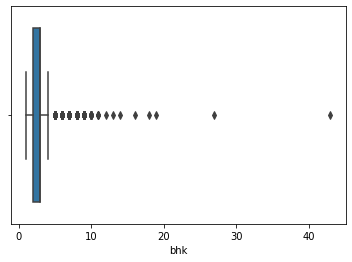

In [83]:
sns.boxplot(df['bhk'])

<AxesSubplot:xlabel='total_sqft'>

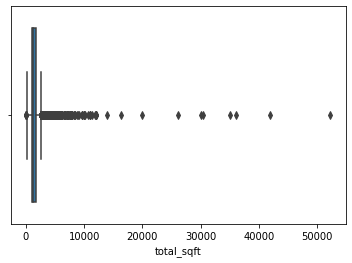

In [84]:
sns.boxplot(df['total_sqft'])

<AxesSubplot:xlabel='bath'>

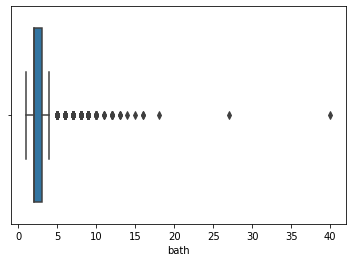

In [85]:
sns.boxplot(df['bath'])

<AxesSubplot:xlabel='price_per_sqft'>

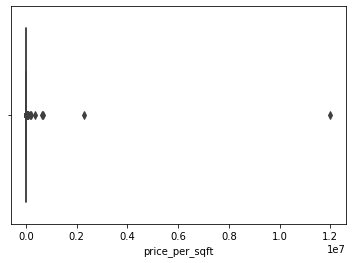

In [87]:
sns.boxplot(df['price_per_sqft'])

In [104]:
Q1 = df['bhk'].quantile(0.25)
Q3 = df['bhk'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print(upper_limit) , print(lower_limit)

df = df[(df['bhk'] > lower_limit) & (df['bhk'] < upper_limit)]

4.5
0.5


In [105]:
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print(upper_limit) , print(lower_limit)

df = df[(df['bath'] > lower_limit) & (df['bath'] < upper_limit)]

4.5
0.5


In [107]:
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print(upper_limit) , print(lower_limit)

df = df[(df['total_sqft'] > lower_limit) & (df['total_sqft'] < upper_limit)]

2354.125
343.125


In [108]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print(upper_limit) , print(lower_limit)

df = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]

10126.555
534.7550000000006


<AxesSubplot:xlabel='bhk'>

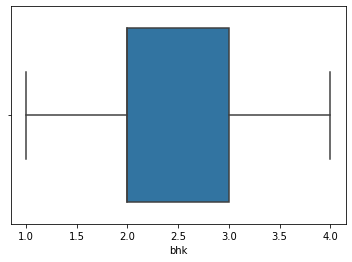

In [109]:
sns.boxplot(df['bhk'])

<AxesSubplot:xlabel='total_sqft'>

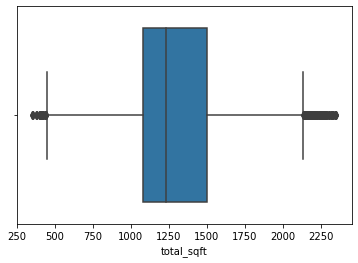

In [110]:
sns.boxplot(df['total_sqft'])

<AxesSubplot:xlabel='bath'>

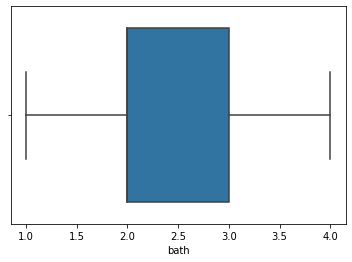

In [111]:
sns.boxplot(df['bath'])

<AxesSubplot:xlabel='price_per_sqft'>

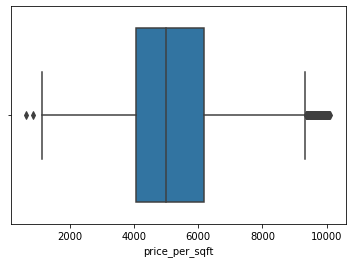

In [112]:
sns.boxplot(df['price_per_sqft'])

In [113]:
df.shape

(10347, 7)

In [114]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10347.000000,10347.000000,10347.000000,10347.000000,10347.000000
mean,1290.065343,2.250024,68.838315,2.395477,5216.727738
std,351.195736,0.620404,32.701353,0.636212,1562.940832
min,350.000000,1.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,45.490000,2.000000,4050.000000
50%,1231.000000,2.000000,60.800000,2.000000,5000.000000
75%,1500.000000,3.000000,85.000000,3.000000,6167.760000
max,2350.000000,4.000000,225.000000,4.000000,10115.610000


<AxesSubplot:xlabel='price'>

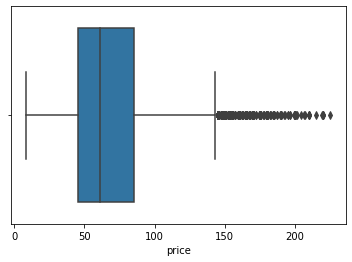

In [115]:
sns.boxplot(df['price'])

# Cleaned Data

In [117]:
df = df[['location' , 'total_sqft' , 'bath' , 'bhk' , 'price']]

In [118]:
df.head()

,location,total_sqft,bath,bhk,price
0,Electronic City Phase II,1056.0,2.0,2,39.07
2,Uttarahalli,1440.0,2.0,3,62.00
3,Lingadheeranahalli,1521.0,3.0,3,95.00
4,Kothanur,1200.0,2.0,2,51.00
5,Whitefield,1170.0,2.0,2,38.00


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10347 non-null  object 
 1   total_sqft  10347 non-null  float64
 2   bath        10347 non-null  float64
 3   bhk         10347 non-null  int32  
 4   price       10347 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 444.6+ KB


In [128]:
df['bath'] = df['bath'].astype('int')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10347 non-null  object 
 1   total_sqft  10347 non-null  float64
 2   bath        10347 non-null  int32  
 3   bhk         10347 non-null  int32  
 4   price       10347 non-null  float64
dtypes: float64(2), int32(2), object(1)
memory usage: 404.2+ KB


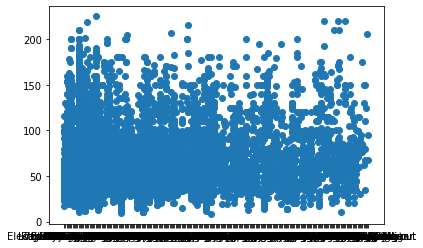

In [203]:
plt.scatter(df['location'] , df['price'])

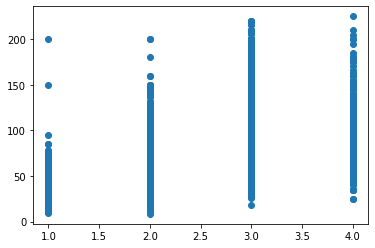

In [204]:
plt.scatter(df['bhk'] , df['price'])

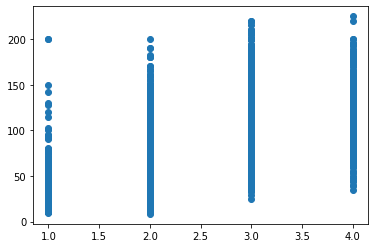

In [205]:
plt.scatter(df['bath'] , df['price'])

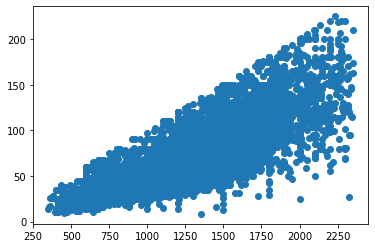

In [206]:
plt.scatter(df['total_sqft'] , df['price'])

In [130]:
df.to_csv('cleaned_data.csv')

In [131]:
X  = df.drop('price' , axis= 1)
y = df['price']

In [132]:
X.head()

,location,total_sqft,bath,bhk
0,Electronic City Phase II,1056.0,2,2
2,Uttarahalli,1440.0,2,3
3,Lingadheeranahalli,1521.0,3,3
4,Kothanur,1200.0,2,2
5,Whitefield,1170.0,2,2


In [133]:
y.head()

0    39.07
2    62.00
3    95.00
4    51.00
5    38.00
Name: price, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [187]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 111)

In [144]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((8277, 4), (8277,), (2070, 4), (2070,))

# Building a Model

In [244]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False, handle_unknown='ignore' , drop='first') , ['location']) , remainder='passthrough')

In [245]:
scaler = StandardScaler()

In [246]:
lr = LinearRegression(normalize=True)

In [247]:
pipe_lr = make_pipeline(column_trans , scaler , lr )

In [248]:
pipe_lr.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [194]:
y_pred_lr = pipe_lr.predict(X_test)

In [195]:
r2_score(y_test , y_pred_lr)

0.6922013663300752

In [198]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

pipe_RF = make_pipeline(column_trans , scaler , RF)
pipe_RF.fit(X_train , y_train)
y_pred_RF = pipe_RF.predict(X_test)
r2_score(y_test , y_pred_RF)

0.7179124364154069

In [207]:
lasso = Lasso()

pipe_lasso = make_pipeline(column_trans , scaler , lasso)
pipe_lasso.fit(X_train , y_train)
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test , y_pred_lasso)

0.6408373014290716

In [208]:
ridge = Ridge()

pipe_ridge = make_pipeline(column_trans , scaler , ridge)
pipe_ridge.fit(X_train , y_train)
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test , y_pred_ridge)

0.6922187485700113

In [249]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()

pipe_xgboost = make_pipeline(column_trans , scaler , xgboost)
pipe_xgboost.fit(X_train , y_train)
y_pred_xgboost = pipe_xgboost.predict(X_test)
r2_score(y_test , y_pred_xgboost)

0.7276508226803127

In [250]:
import pickle
pickle.dump(pipe_xgboost , open('house_price-model.pkl' , 'wb') )

In [251]:
pipe_xgboost.predict(pd.DataFrame(np.array(['Electronic City Phase II' , 1056.0  , 2 ,2]).reshape(1,4) , columns=['location' , 'total_sqft' , 'bath' , 'bhk']))

array([38.447903], dtype=float32)

In [253]:
import sklearn
sklearn.__version__

'1.0.2'